# Explore here

In [5]:
import pandas as pd

# Cargar los datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
data = pd.read_csv(url)

# Visualizar las primeras filas del conjunto de datos
print(data.head())
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


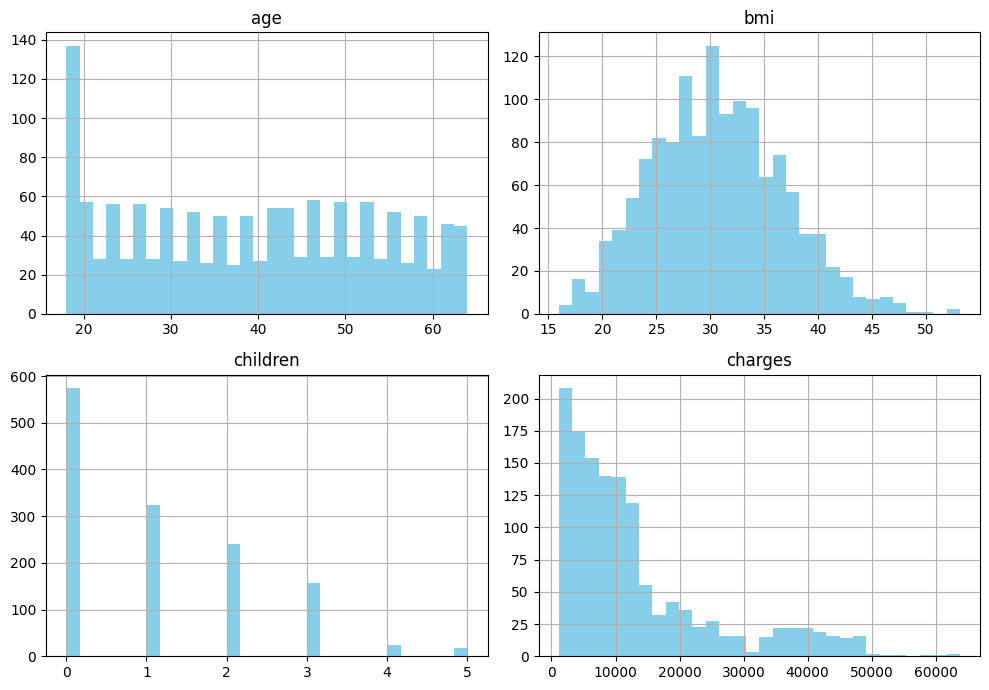

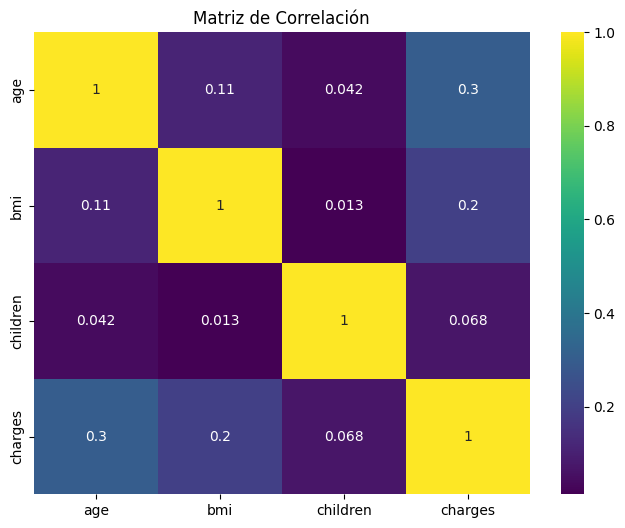

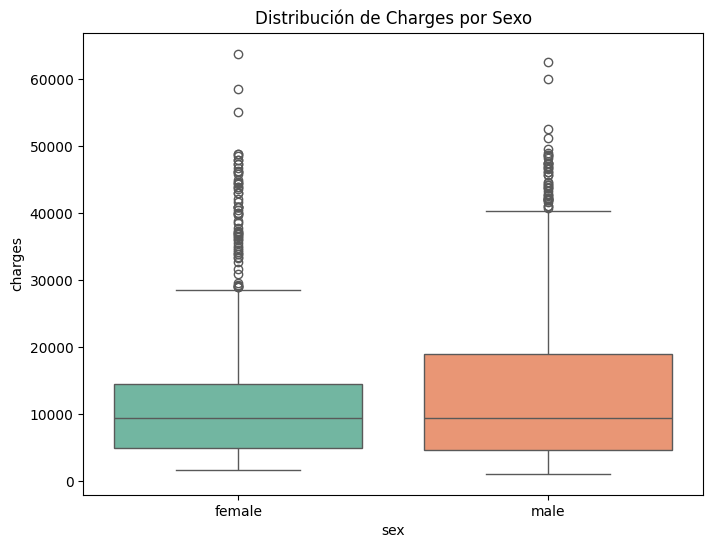

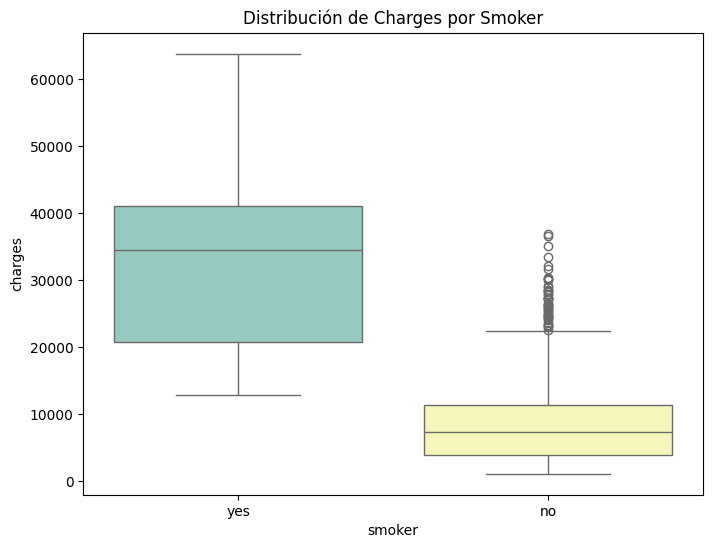

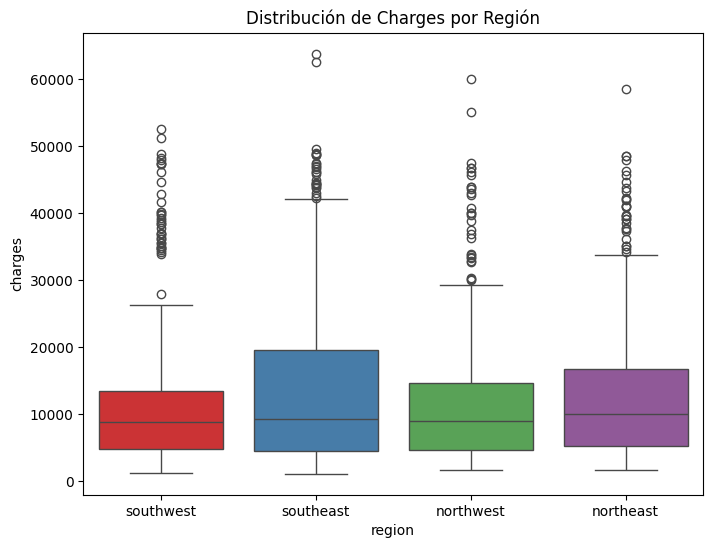

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
print(data.describe())

# Distribución de las variables numéricas
data.hist(bins=30, figsize=(10, 7), color='skyblue')
plt.tight_layout()
plt.show()

# Análisis de correlación solo con variables numéricas
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriz de Correlación')
plt.show()

# Boxplot para las variables categóricas
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', hue='sex', data=data, palette='Set2', dodge=False)
plt.title('Distribución de Charges por Sexo')
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', hue='smoker', data=data, palette='Set3', dodge=False)
plt.title('Distribución de Charges por Smoker')
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', hue='region', data=data, palette='Set1', dodge=False)
plt.title('Distribución de Charges por Región')
plt.legend([], [], frameon=False)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Separar variables independientes y dependientes
X = data.drop('charges', axis=1)
y = data['charges']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de variables categóricas
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Transformador para las características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Construir el pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 33596915.85136146
R2 Score: 0.7835929767120723


In [8]:
from sklearn.linear_model import Ridge, Lasso

# Optimización con Ridge
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2 Score: {ridge_r2}')

# Optimización con Lasso
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R2 Score: {lasso_r2}')

Ridge MSE: 33619947.007616326
Ridge R2 Score: 0.7834446266673823
Lasso MSE: 33605889.75676364
Lasso R2 Score: 0.7835351733064281


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

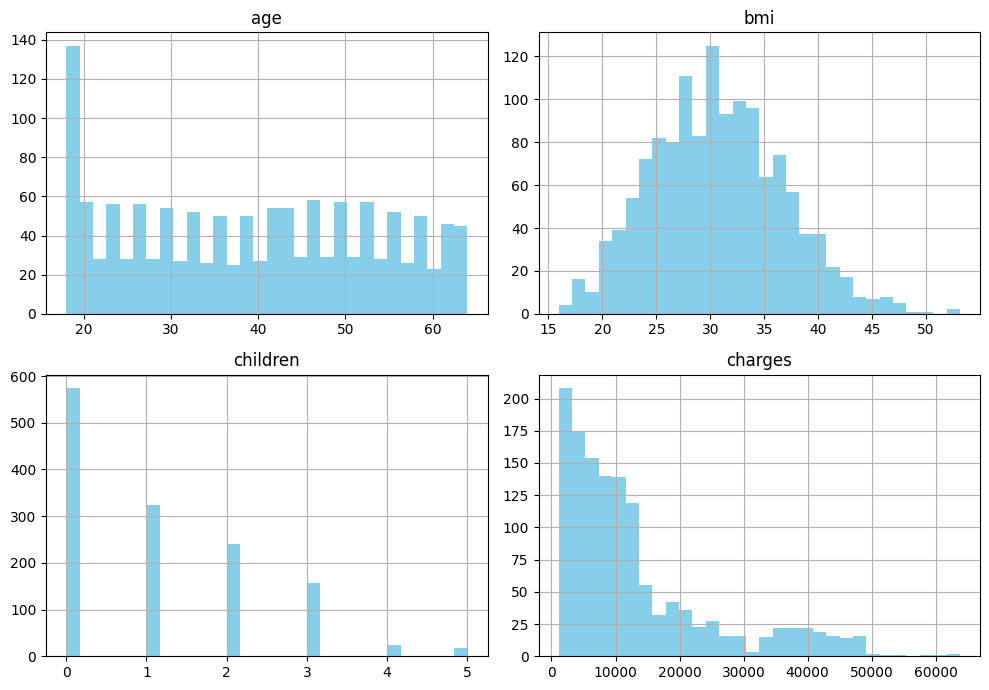

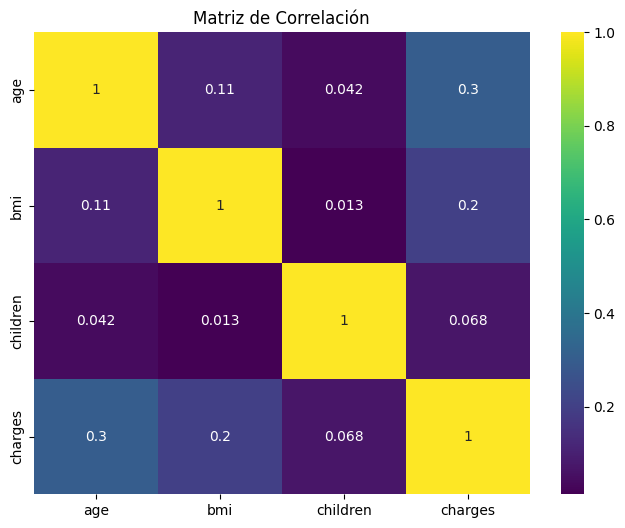

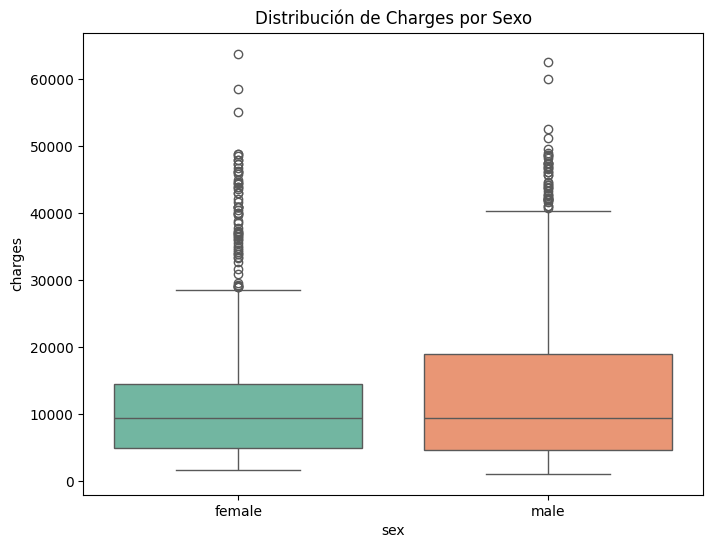

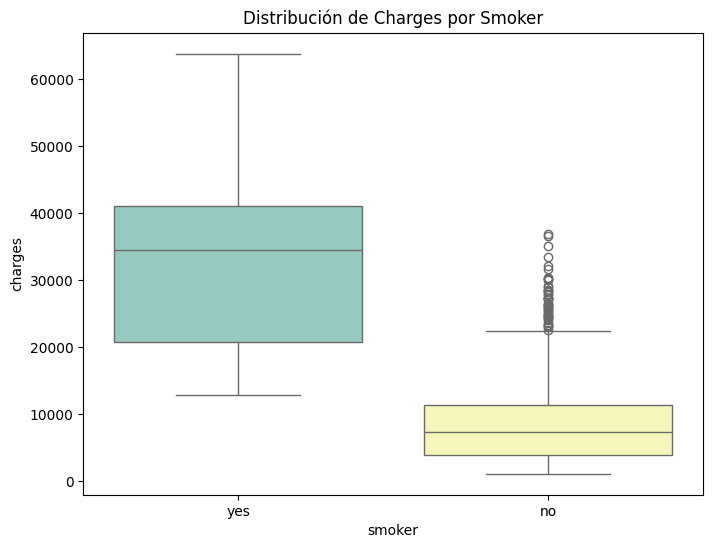

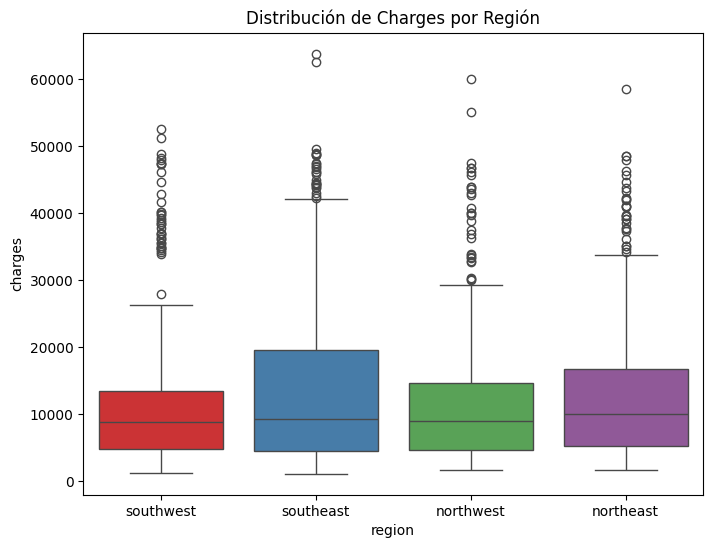

MSE: 33596915.85136146
R2 Score: 0.7835929767120723
Ridge MSE: 33619947.007616326
Ridge R2 Score: 0.7834446266673823
Lasso MSE: 33605889.75676364
Lasso R2 Score: 0.7835351733064281


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Paso 1: Carga del conjunto de datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
data = pd.read_csv(url)

# Comprender el dataset
print(data.head())
print(data.info())
print(data.describe())

# Paso 2: Análisis Exploratorio de Datos (EDA)

# Distribución de las variables numéricas
data.hist(bins=30, figsize=(10, 7), color='skyblue')
plt.tight_layout()
plt.show()

# Análisis de correlación solo con variables numéricas
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriz de Correlación')
plt.show()

# Boxplot para las variables categóricas
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', hue='sex', data=data, palette='Set2', dodge=False)
plt.title('Distribución de Charges por Sexo')
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', hue='smoker', data=data, palette='Set3', dodge=False)
plt.title('Distribución de Charges por Smoker')
plt.legend([], [], frameon=False)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', hue='region', data=data, palette='Set1', dodge=False)
plt.title('Distribución de Charges por Región')
plt.legend([], [], frameon=False)
plt.show()

# Paso 3: Construcción del modelo de regresión lineal

# Separar variables independientes y dependientes
X = data.drop('charges', axis=1)
y = data['charges']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de variables categóricas
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Transformador para las características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Construir el pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

# Paso 4: Optimización del modelo

# Optimización con Ridge
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2 Score: {ridge_r2}')

# Optimización con Lasso
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R2 Score: {lasso_r2}')